# Text Classification project
## Information Retrival course
### JCT, Data Science
* Name: Elroi Netzer
* ID: 208612937
* Phone: 0525551587

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from features_extract import *
from models import *

## Loading the Data

In [2]:
data_file = r".\\chaverim_makshivim-train.xlsx"
data = pd.read_excel(data_file)

In [3]:
data.head(2)

,Seq,Site,URL,ID,Hdate,Rabby,Subject,Question,Answer,Tags,...,QuestionLen,AnswerLen,Year,Hyear,Hmonth,Hday,Gender,1 גברים,2 נשים,AnswerGender
0,NaN,כיפה,www.kipa.co.il/ask/show/121227-שנאת-ערבים,121227,"ד תמוז תשס""ז",חברים מקשיבים,שנאת ערבים,"\nשלום לכם, אני נער בן 14 וגר באחת ה""התנחלויות...","\nב""ה\nד´ שלום!\nראשית רציתי לומר לך שאני מאוד...",NaN,...,182,1257,2007,תשסז,תמוז,ד,1,NaN,NaN,1.0
1,NaN,כיפה,www.kipa.co.il/ask/show/296834-ברכת-המזון-ראש-...,296834,"א כסליו תשע""ד",חברים מקשיבים,ברכת המזון ראש חודש,\nלעיתים יוצא לנו להתחיל את הסעודה בראש חודש ו...,"\nב""ה\nשלום וברכה\nהדבר נתון במחלוקת הפוסקים ה...",NaN,...,286,1095,2013,תשעד,כסליו,א,1,NaN,NaN,1.0


In [4]:
data["Question"].iloc[1]

'\nלעיתים יוצא לנו להתחיל את הסעודה בראש חודש ולסיים אותה בחשכת זאת אומרת שיוצא ראש חודש השאלה האם צריך להזכיר יעלה ויבוא בברכת המזון כי נוצר מצב שהמברך כבר לא בראש חודש כי נכנס לחשכה כשכבר יצא ראש חודש.\nשאלה שניה מה קורה כאשר ראש חודש נופל בשבת וסעודה שלישית מתארכת לחשכה כשכבר יצא שבת .'

## Features Extraction

### Pre Processing and Tokenizing:

In [5]:
useless_cols = ['Seq', 'Site', 'URL', 'ID', 'Hdate', 'Rabby', 'Subject', 'Tags', 'SubjectLen', 'Year',
       'Hyear', 'Hmonth', 'Hday', '1 גברים', '2 נשים']
data = data.drop(useless_cols, axis=1)

In [6]:
data.head(2)

,Question,Answer,QuestionLen,AnswerLen,Gender,AnswerGender
0,"\nשלום לכם, אני נער בן 14 וגר באחת ה""התנחלויות...","\nב""ה\nד´ שלום!\nראשית רציתי לומר לך שאני מאוד...",182,1257,1,1.0
1,\nלעיתים יוצא לנו להתחיל את הסעודה בראש חודש ו...,"\nב""ה\nשלום וברכה\nהדבר נתון במחלוקת הפוסקים ה...",286,1095,1,1.0


In [7]:
create_bert_tokens_columns(data) # Without Stop Words
create_bert_tokens_columns(data, False) # With Stop Words

Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors


In [8]:
data.head(2)

,Question,Answer,QuestionLen,AnswerLen,Gender,AnswerGender,Q_bert_tokens_no_sw,Q_bert_tokens
0,"\nשלום לכם, אני נער בן 14 וגר באחת ה""התנחלויות...","\nב""ה\nד´ שלום!\nראשית רציתי לומר לך שאני מאוד...",182,1257,1,1.0,"[שלום, נער, בן, וגר, באחת, התנחלויות, אשמח, לד...","[שלום, לכם, אני, נער, בן, וגר, באחת, התנחלויות..."
1,\nלעיתים יוצא לנו להתחיל את הסעודה בראש חודש ו...,"\nב""ה\nשלום וברכה\nהדבר נתון במחלוקת הפוסקים ה...",286,1095,1,1.0,"[לעיתים, יוצא, להתחיל, הסעודה, בראש, חודש, ולס...","[לעיתים, יוצא, לנו, להתחיל, את, הסעודה, בראש, ..."


### Vocabulary Creation:

In [9]:
q_vocab_above_10 = create_filter_vocab_by_freq(data["Q_bert_tokens_no_sw"], 10)
q_vocab_above_50 = create_filter_vocab_by_freq(data["Q_bert_tokens_no_sw"], 50)
q_vocab_above_100 = create_filter_vocab_by_freq(data["Q_bert_tokens_no_sw"], 100)

In [10]:
q_vocab_above_10_sw = create_filter_vocab_by_freq(data["Q_bert_tokens"], 10)
q_vocab_above_50_sw = create_filter_vocab_by_freq(data["Q_bert_tokens"], 50)
q_vocab_above_100_sw = create_filter_vocab_by_freq(data["Q_bert_tokens"], 100)

In [11]:
print(len(q_vocab_above_10))
print(len(q_vocab_above_50))
print(len(q_vocab_above_100))
print(len(q_vocab_above_10_sw))
print(len(q_vocab_above_50_sw))
print(len(q_vocab_above_100_sw))

6779
1422
688
6959
1567
815


### Vectorizing using TF-IDF:

In [12]:
tfidf_vect_above_10 = create_tfidf_vector_df(data["Q_bert_tokens_no_sw"], q_vocab_above_10)
tfidf_vect_above_50 = create_tfidf_vector_df(data["Q_bert_tokens_no_sw"], q_vocab_above_50)
tfidf_vect_above_100 = create_tfidf_vector_df(data["Q_bert_tokens_no_sw"], q_vocab_above_100)

c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
tfidf_vect_above_10_sw = create_tfidf_vector_df(data["Q_bert_tokens"], q_vocab_above_10_sw)
tfidf_vect_above_50_sw = create_tfidf_vector_df(data["Q_bert_tokens"], q_vocab_above_50_sw)
tfidf_vect_above_100_sw = create_tfidf_vector_df(data["Q_bert_tokens"], q_vocab_above_100_sw)

c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
print(tfidf_vect_above_10.head(2))
print(tfidf_vect_above_50.head(2))
print(tfidf_vect_above_100.head(2))
print(tfidf_vect_above_10_sw.head(2))
print(tfidf_vect_above_50_sw.head(2))
print(tfidf_vect_above_100_sw.head(2))


   ##א  ##אב  ##אג  ##אד  ##אה  ##או  ##אול  ##אולה  ##אוש  ##אות  ...  תרצה  \
0  0.0   0.0   0.0   0.0   0.0   0.0    0.0     0.0    0.0    0.0  ...   0.0   
1  0.0   0.0   0.0   0.0   0.0   0.0    0.0     0.0    0.0    0.0  ...   0.0   

   תשובה  תשובות  תשובת  תשומת  תשלחו  תשמ   תת  תתנו  תתפ  
0    0.0     0.0    0.0    0.0    0.0  0.0  0.0   0.0  0.0  
1    0.0     0.0    0.0    0.0    0.0  0.0  0.0   0.0  0.0  

[2 rows x 6779 columns]
   ##א  ##אה  ##אות  ##אלה  ##אש  ##אשת  ##את  ##ב  ##בה  ##בו  ...  תמיד  \
0  0.0   0.0    0.0    0.0   0.0    0.0   0.0  0.0   0.0   0.0  ...   0.0   
1  0.0   0.0    0.0    0.0   0.0    0.0   0.0  0.0   0.0   0.0  ...   0.0   

   תעזרו  תענו  תפילה  תפילות  תפילין  תפילת  תקופה  תשובה  תשובות  
0    0.0   0.0    0.0     0.0     0.0    0.0    0.0    0.0     0.0  
1    0.0   0.0    0.0     0.0     0.0    0.0    0.0    0.0     0.0  

[2 rows x 1422 columns]
   ##א  ##ב  ##בר  ##ד  ##ה  ##ו  ##וב  ##וה  ##ול  ##ון  ...  תודה  תוכלו  \
0  0.0  0

### Writing features to file:

In [15]:
featurs_folder = r"C:\\Users\\elroi\\OneDrive\\Desktop\\DataMining\\InformationRetrieval\\project\\features\\"

features = [tfidf_vect_above_10, tfidf_vect_above_50, tfidf_vect_above_100,
            tfidf_vect_above_10_sw, tfidf_vect_above_50_sw, tfidf_vect_above_100_sw]

names = ["tfidf_vector_above_10_no_sw.csv",
         "tfidf_vector_above_50_no_sw.csv",
         "tfidf_vector_above_100_no_sw.csv",
         "tfidf_vector_above_10.csv",
         "tfidf_vector_above_50.csv",
         "tfidf_vector_above_100.csv"]

In [16]:
# for feat, name in zip(features, names):
#     data_with_feat = concat_feat_with_data(data, feat)
#     write_data_with_feat_to_csv(data_with_feat, featurs_folder, name)

## Question Gender Classification

### reading the data:

In [17]:
feat_above_10 = "tfidf_vector_above_10_no_sw.csv"
feat_above_50 = "tfidf_vector_above_50_no_sw.csv"
feat_above_100 = "tfidf_vector_above_100_no_sw.csv"

feat_above_10_sw = "tfidf_vector_above_10.csv"
feat_above_50_sw = "tfidf_vector_above_50.csv"
feat_above_100_sw = "tfidf_vector_above_100.csv"

In [18]:
names = ["tfidf_vector_above_10_no_sw.csv",
         "tfidf_vector_above_50_no_sw.csv",
         "tfidf_vector_above_100_no_sw.csv",
         "tfidf_vector_above_10.csv",
         "tfidf_vector_above_50.csv",
         "tfidf_vector_above_100.csv"]

In [19]:
def read_features_file(path):
    df = pd.read_csv(path)
    return df.drop(["Unnamed: 0"], axis=1)

### Train-Test Split

In [18]:
features_files = ["features/{}".format(i) for i in names]

all_features_vectors = [df_train_test_split(read_features_file(ff)) for ff in features_files]
all_features_strings = ["TF-IDF above 10 No SW", "TF-IDF above 50 No SW", "TF-IDF above 100 No SW", "TF-IDF above 10", "TF-IDF above 50", "TF-IDF above 100"]

### Logistic Regression:

In [19]:
log_reg_models = []

for feat, name in zip(all_features_vectors, all_features_strings):
    print("*"*30 + " {:^40} ".format(name) + "*"*30)
    log_reg_models.append(LogReg(*feat))

******************************          TF-IDF above 10 No SW           ******************************
LogReg train accuracy: 0.851
LogReg test accuracy: 0.819
Accuracy: 0.8187599364069952
[[560  68]
 [160 470]]
Classification report:
               precision    recall  f1-score   support

           1       0.78      0.89      0.83       628
           2       0.87      0.75      0.80       630

    accuracy                           0.82      1258
   macro avg       0.83      0.82      0.82      1258
weighted avg       0.83      0.82      0.82      1258

******************************          TF-IDF above 50 No SW           ******************************
LogReg train accuracy: 0.902
LogReg test accuracy: 0.862
Accuracy: 0.8616852146263911
[[575  53]
 [121 509]]
Classification report:
               precision    recall  f1-score   support

           1       0.83      0.92      0.87       628
           2       0.91      0.81      0.85       630

    accuracy                         

| Model | Train Accuracy | Test Accuracy |
| :- | :-: | :-: |
| TF-IDF above 10 No SW | 0.851 | 0.819
| **TF-IDF above 50 No SW** | **0.902** | **0.862**
| TF-IDF above 100 No SW | 0.885 | 0.862   
| **TF-IDF above 10**    | **0.909** | **0.866**
| TF-IDF above 50    | 0.779 | 0.776   
| TF-IDF above 100   | 0.884 | 0.864

|Model | Class| precision | recall | f1-score | support
| :-: | :-: | :-: | :-: | :-: | :-: |
| TF-IDF above 10 No SW | 1 | 0.78 | 0.89 | 0.83 | 628
|  | 2 | 0.87 | 0.75 | 0.80 | 630
|  | avg | 0.83 | 0.82 | 0.82 | 1258 |
| |
| TF-IDF above 50 No SW | 1 | 0.83 | 0.92 | 0.87 | 628
|  | 2 | 0.91 | 0.81 | 0.85 | 630
|  | avg | 0.87 | 0.86 | 0.86 | 1258 |
| |
| TF-IDF above 100 No SW | 1 | 0.83 | 0.91 | 0.87 | 628
|  | 2 | 0.90 | 0.81 | 0.85 | 630
|  | avg | 0.86 | 0.86 | 0.86 | 1258 |
| |
| TF-IDF above 10 | 1 | 0.82 | 0.93 | 0.87 | 628
|  | 2 | 0.92 | 0.80 | 0.86 | 630
|  | avg | 0.87 | 0.87 | 0.87 | 1258 |
| |
| TF-IDF above 50 | 1 | 0.75 | 0.82 | 0.79 | 628
|  | 2 | 0.81 | 0.73 | 0.76 | 630
|  | avg | 0.78 | 0.78 | 0.78 | 1258 |
| |
| TF-IDF above 100 | 1 | 0.83 | 0.92 | 0.87 | 628
|  | 2 | 0.91 | 0.81 | 0.86 | 630
|  | avg | 0.87 | 0.86 | 0.86 | 1258 |
| |

******************************          TF-IDF above 10 No SW           ******************************


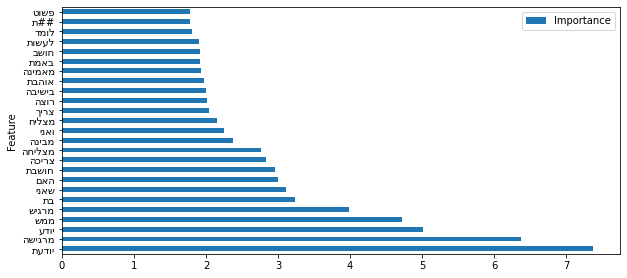

******************************          TF-IDF above 50 No SW           ******************************


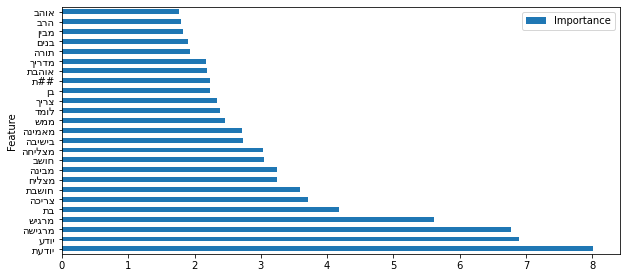

******************************          TF-IDF above 100 No SW          ******************************


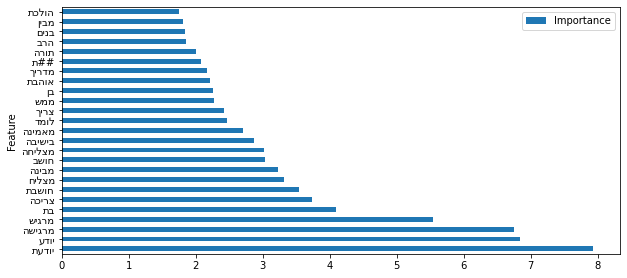

******************************             TF-IDF above 10              ******************************


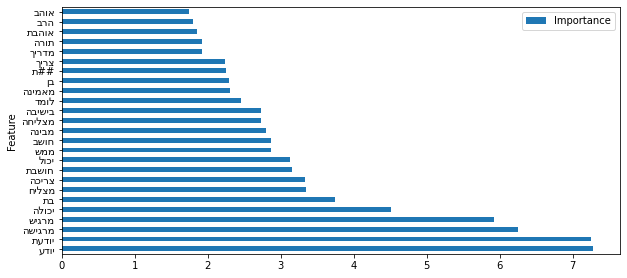

In [21]:
for i in range(4):
    print("*"*30 + " {:^40} ".format(all_features_strings[i]) + "*"*30)
    plot_features_importance(log_reg_models[i].coef_[0], all_features_vectors[i][0])
    plt.show()

### Random Forest:

In [24]:
rand_forest_models = []

for feat, name in zip(all_features_vectors, all_features_strings):
    print("*"*30 + " {:^40} ".format(name) + "*"*30)
    rand_forest_models.append(RandForest(*feat, n_estimators=100, max_depth=50))

******************************          TF-IDF above 10 No SW           ******************************
RandForest train accuracy: 0.984
RandForest test accuracy: 0.880
Accuracy: 0.8799682034976153
[[587  41]
 [110 520]]
Classification report:
               precision    recall  f1-score   support

           1       0.84      0.93      0.89       628
           2       0.93      0.83      0.87       630

    accuracy                           0.88      1258
   macro avg       0.88      0.88      0.88      1258
weighted avg       0.88      0.88      0.88      1258

******************************          TF-IDF above 50 No SW           ******************************
RandForest train accuracy: 0.989
RandForest test accuracy: 0.877
Accuracy: 0.8767885532591415
[[585  43]
 [112 518]]
Classification report:
               precision    recall  f1-score   support

           1       0.84      0.93      0.88       628
           2       0.92      0.82      0.87       630

    accuracy         

#### Random Forest Results:

| Model | Train Accuracy | Test Accuracy |
| :- | :-: | :-: |
| TF-IDF above 10 No SW | 0.984 | 0.880
| TF-IDF above 50 No SW | 0.989 | 0.877
| TF-IDF above 100 No SW | 0.993 | 0.872
| TF-IDF above 10    | 0.994 | 0.872
| TF-IDF above 50    | 0.998 | 0.880
| TF-IDF above 100   | 0.999 | 0.882
  

we can see that all models are overfitting. examining the strongest features:

******************************          TF-IDF above 10 No SW           ******************************


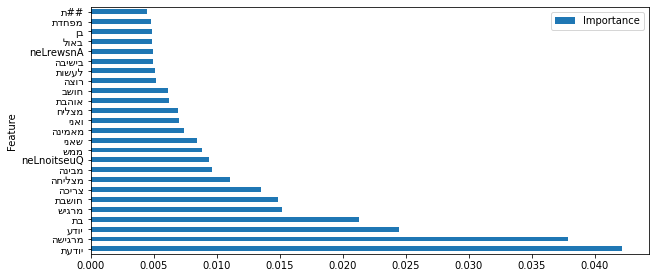

******************************          TF-IDF above 50 No SW           ******************************


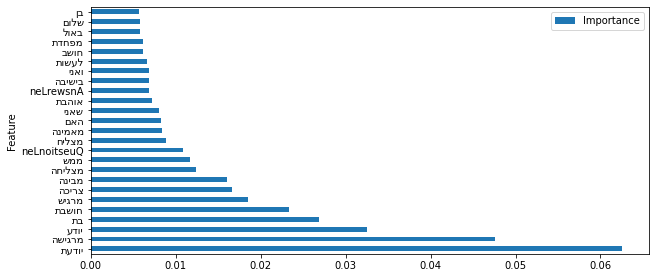

******************************          TF-IDF above 100 No SW          ******************************


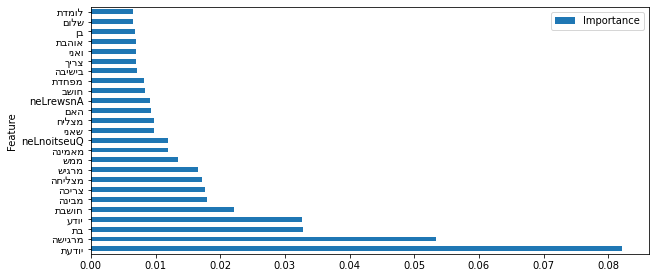

******************************             TF-IDF above 10              ******************************


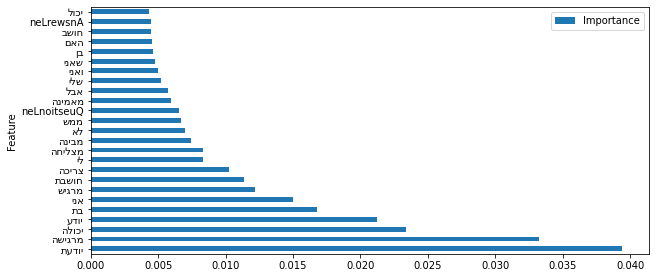

******************************             TF-IDF above 50              ******************************


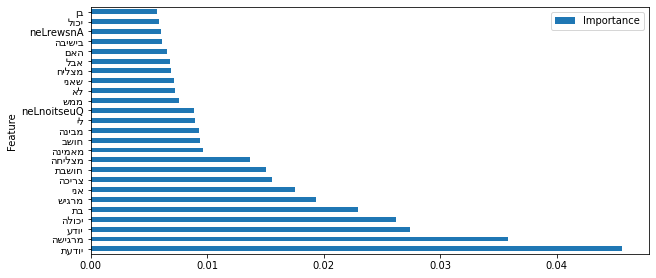

******************************             TF-IDF above 100             ******************************


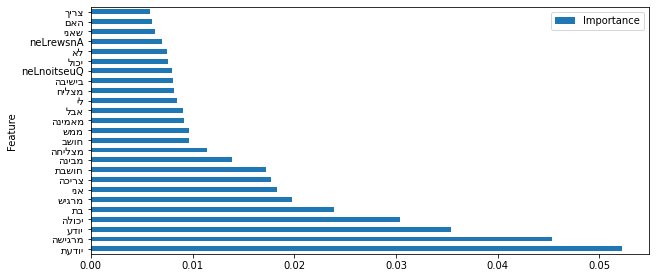

In [24]:
for i in range(len(all_features_strings)):
    print("*"*30 + " {:^40} ".format(all_features_strings[i]) + "*"*30)
    plot_features_importance(rand_forest_models[i].feature_importances_, all_features_vectors[i][0])
    plt.show()

#### Handling RF Overfitting:

In [25]:
best_feat_q_only = all_features_vectors[4] # Tfidf above 50
param_grid = {
        "n_estimators" : [10, 50, 100],  
        "max_depth" : [5, 25, 50, 75],  
        "min_samples_leaf" : [1, 5, 10]
    }

rfgs_model = RFGSCV(*best_feat_q_only, param_grid)

{'max_depth': 75, 'min_samples_leaf': 1, 'n_estimators': 100}
29
0.9351002876773237
RandomForestClassifier(max_depth=75, n_jobs=-1, random_state=42)


In [36]:
best_model_on_tfidf_above_50 = RandForest(*best_feat_q_only, n_estimators=100, max_depth=75, min_samples_leaf=1)

RandForest train accuracy: 1.000
RandForest test accuracy: 0.885
Accuracy: 0.884737678855326
[[595  33]
 [112 518]]
Classification report:
               precision    recall  f1-score   support

           1       0.84      0.95      0.89       628
           2       0.94      0.82      0.88       630

    accuracy                           0.88      1258
   macro avg       0.89      0.88      0.88      1258
weighted avg       0.89      0.88      0.88      1258



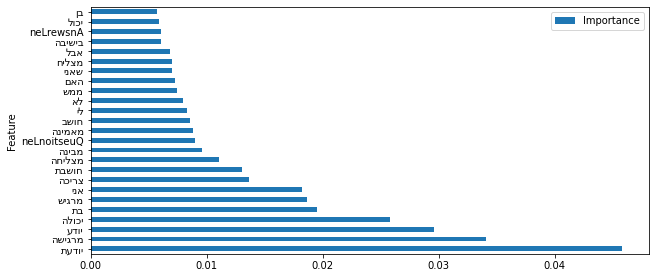

In [38]:
plot_features_importance(best_model_on_tfidf_above_50.feature_importances_, best_feat_q_only[0])

#### Evaluating the model against Answers Data

In [20]:
from features_extract import create_bert_tokens_columns_answer

In [21]:
data_file = r".\\chaverim_makshivim-train.xlsx"
data2 = pd.read_excel(data_file)

In [22]:
useless_cols = ['Seq', 'Site', 'URL', 'ID', 'Hdate', 'Rabby', 'Subject', 'Tags', 'SubjectLen', 'Year',
       'Hyear', 'Hmonth', 'Hday', '1 גברים', '2 נשים']
data2 = data2.drop(useless_cols, axis=1)

In [24]:
data2.head(3)

,Question,Answer,QuestionLen,AnswerLen,Gender,AnswerGender
0,"\nשלום לכם, אני נער בן 14 וגר באחת ה""התנחלויות...","\nב""ה\nד´ שלום!\nראשית רציתי לומר לך שאני מאוד...",182,1257,1,1.0
1,\nלעיתים יוצא לנו להתחיל את הסעודה בראש חודש ו...,"\nב""ה\nשלום וברכה\nהדבר נתון במחלוקת הפוסקים ה...",286,1095,1,1.0
2,\nא ישר כח על האתר!\nאיך אפשר לנצל את החופש בצ...,"\nלק""י\n\nשלום לך \nראשית, תודה על המילים החמו...",198,767,1,1.0


In [25]:
create_bert_tokens_columns_answer(data2)
create_bert_tokens_columns_answer(data2, sw = False)

In [26]:
data2.head(2)

,Question,Answer,QuestionLen,AnswerLen,Gender,AnswerGender,A_bert_tokens_no_sw,A_bert_tokens
0,"\nשלום לכם, אני נער בן 14 וגר באחת ה""התנחלויות...","\nב""ה\nד´ שלום!\nראשית רציתי לומר לך שאני מאוד...",182,1257,1,1.0,"[שלום, ראשית, רציתי, לומר, לך, שאני, מבין, תחו...","[שלום, ראשית, רציתי, לומר, לך, שאני, מאוד, מבי..."
1,\nלעיתים יוצא לנו להתחיל את הסעודה בראש חודש ו...,"\nב""ה\nשלום וברכה\nהדבר נתון במחלוקת הפוסקים ה...",286,1095,1,1.0,"[שלום, וברכה, הדבר, נתון, במחלוקת, הפוסקים, הא...","[שלום, וברכה, הדבר, נתון, במחלוקת, הפוסקים, הא..."


Note thar we are using the vocabularies created earlier:

In [27]:
tfidf_a_vect_above_10_sw = create_tfidf_vector_df(data2["A_bert_tokens"], q_vocab_above_10_sw)
tfidf_a_vect_above_50_sw = create_tfidf_vector_df(data2["A_bert_tokens"], q_vocab_above_50_sw)
tfidf_a_vect_above_100_sw = create_tfidf_vector_df(data2["A_bert_tokens"], q_vocab_above_100_sw)
tfidf_a_vect_above_10 = create_tfidf_vector_df(data2["A_bert_tokens_no_sw"], q_vocab_above_10)
tfidf_a_vect_above_50 = create_tfidf_vector_df(data2["A_bert_tokens_no_sw"], q_vocab_above_50)
tfidf_a_vect_above_100 = create_tfidf_vector_df(data2["A_bert_tokens_no_sw"], q_vocab_above_100)

c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\elroi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: Use

In [28]:
print(tfidf_a_vect_above_10_sw.shape)
print(tfidf_a_vect_above_50_sw.shape)
print(tfidf_a_vect_above_100_sw.shape)
print(tfidf_a_vect_above_10.shape)
print(tfidf_a_vect_above_50.shape)
print(tfidf_a_vect_above_100.shape)

(5031, 6959)
(5031, 1567)
(5031, 815)
(5031, 6779)
(5031, 1422)
(5031, 688)


In [34]:
featurs_folder = r"C:\\Users\\elroi\\OneDrive\\Desktop\\DataMining\\InformationRetrieval\\project\\features\\"

a_features = [tfidf_a_vect_above_10_sw, tfidf_a_vect_above_50_sw, tfidf_a_vect_above_100_sw, 
            tfidf_a_vect_above_10, tfidf_a_vect_above_50, tfidf_a_vect_above_100]

a_names = ["tfidf_a_vect_above_10_sw.csv",
         "tfidf_a_vect_above_50_sw.csv",
         "tfidf_a_vect_above_100_sw.csv",
         "tfidf_a_vect_above_10.csv",
         "tfidf_a_vect_above_50.csv",
         "tfidf_a_vect_above_100.csv"]

In [35]:
def concat_a_feat_with_data(data, feat_df):
    col_from_data = ["Question", "Answer", "QuestionLen", "AnswerLen", "Gender", "AnswerGender"]
    data_with_feat = pd.concat([data[col_from_data], feat_df], axis=1).dropna()
    data_with_feat = data_with_feat.astype({"AnswerGender": 'int'})
    return data_with_feat

In [36]:
def write_data_with_feat_to_csv(df, folder, file_name):
    df.to_csv(folder + file_name)

In [37]:
dfs = [concat_a_feat_with_data(data, f) for f in a_features]

In [44]:
for df in dfs:
    print(df.shape)

count    64.000000
mean      1.328125
std       0.473242
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: AnswerGender, dtype: float64
count    64.000000
mean      1.328125
std       0.473242
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: AnswerGender, dtype: float64
count    64.000000
mean      1.328125
std       0.473242
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: AnswerGender, dtype: float64
count    64.000000
mean      1.328125
std       0.473242
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: AnswerGender, dtype: float64
count    64.000000
mean      1.328125
std       0.473242
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: AnswerGender, dtype: float64
count    64.000000
mean      1.328125
std       0.473242
min     

In [45]:
for df, name in zip(dfs, a_names):
    write_data_with_feat_to_csv(df, featurs_folder, name)

In [46]:
def get_x_a(df):
    return df.drop(["Question", "Answer", "Gender", "AnswerGender"], axis=1)

def get_y_a(df):
    return df["AnswerGender"]

def df_train_test_split_a(df):
    X = get_x_a(df)
    Y = get_y_a(df)

    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        Y, 
        test_size = 0.25, 
        stratify=Y, 
        random_state=42
    )

    return X_train, X_test, y_train, y_test

In [47]:
a_features_files = ["features/{}".format(i) for i in a_names]

all_a_features_vectors = [df_train_test_split_a(read_features_file(ff)) for ff in a_features_files]
all_a_features_strings = ["Answers TF-IDF above 10 No SW", "Answers TF-IDF above 50 No SW", "Answers TF-IDF above 100 No SW", "Answers TF-IDF above 10", "Answers TF-IDF above 50", "Answers TF-IDF above 100"]

In [49]:
[f[0].shape for f in all_a_features_vectors]

[(48, 6961), (48, 1569), (48, 817), (48, 6781), (48, 1424), (48, 690)]

#### Random Forest Results On Answers:

| Model | Train Accuracy | Test Accuracy | Answers Train Accuracy | Answers Test Accuracy
| :- | :-: | :-: | :-: | :-: |
| TF-IDF above 10 No SW | 0.984 | 0.880 | 1.000 | 0.688
| TF-IDF above 50 No SW | 0.989 | 0.877 | 1.000 | 0.625
| TF-IDF above 100 No SW | 0.993 | 0.872 | 1.000 | 0.750
| TF-IDF above 10    | 0.994 | 0.872 | 1.000 | 0.625
| TF-IDF above 50    | 0.998 | 0.880 | 1.000 | 0.750
| TF-IDF above 100   | 0.999 | 0.882 | 1.000 | 0.750
  

In [50]:
rand_forest_models = []

for feat, name in zip(all_a_features_vectors, all_a_features_strings):
    print("*"*30 + " {:^40} ".format(name) + "*"*30)
    rand_forest_models.append(RandForest(*feat, n_estimators=100, max_depth=50))

******************************      Answers TF-IDF above 10 No SW       ******************************
RandForest train accuracy: 1.000
RandForest test accuracy: 0.688
Accuracy: 0.6875
[[10  1]
 [ 4  1]]
Classification report:
               precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.50      0.20      0.29         5

    accuracy                           0.69        16
   macro avg       0.61      0.55      0.54        16
weighted avg       0.65      0.69      0.64        16

******************************      Answers TF-IDF above 50 No SW       ******************************
RandForest train accuracy: 1.000
RandForest test accuracy: 0.625
Accuracy: 0.625
[[10  1]
 [ 5  0]]
Classification report:
               precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.00      0.00      0.00         5

    accuracy                           0.62        16


******************************      Answers TF-IDF above 10 No SW       ******************************


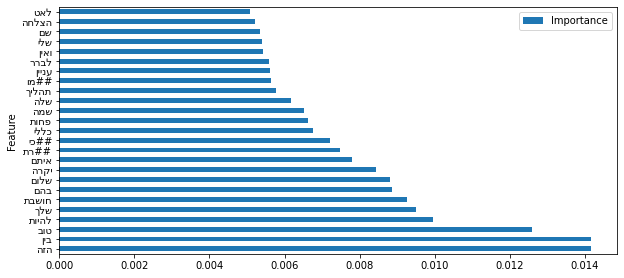

******************************      Answers TF-IDF above 50 No SW       ******************************


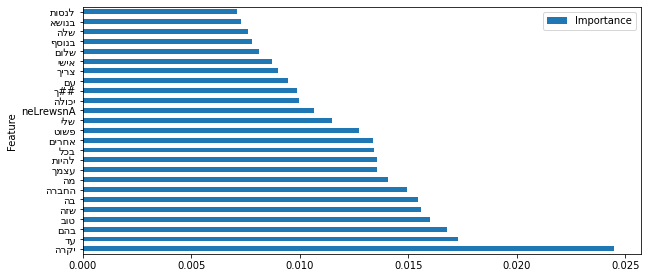

******************************      Answers TF-IDF above 100 No SW      ******************************


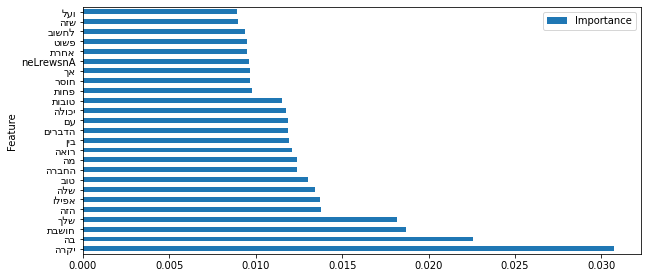

******************************         Answers TF-IDF above 10          ******************************


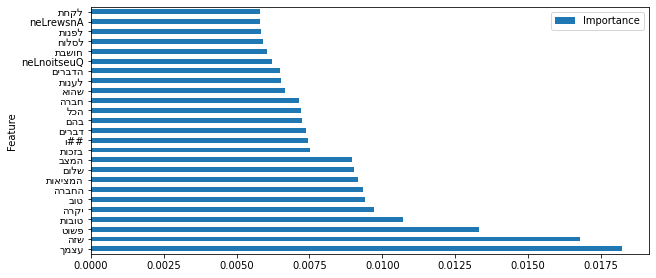

******************************         Answers TF-IDF above 50          ******************************


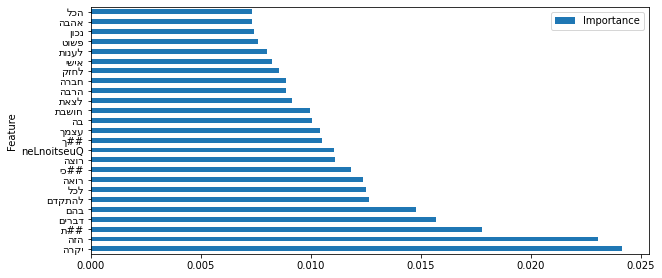

******************************         Answers TF-IDF above 100         ******************************


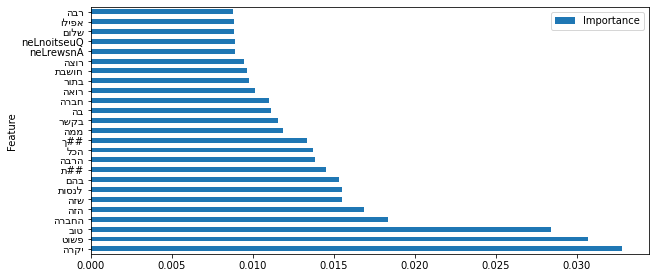

In [51]:
for i in range(len(all_a_features_strings)):
    print("*"*30 + " {:^40} ".format(all_a_features_strings[i]) + "*"*30)
    plot_features_importance(rand_forest_models[i].feature_importances_, all_a_features_vectors[i][0])
    plt.show()